# **Block Averaging**

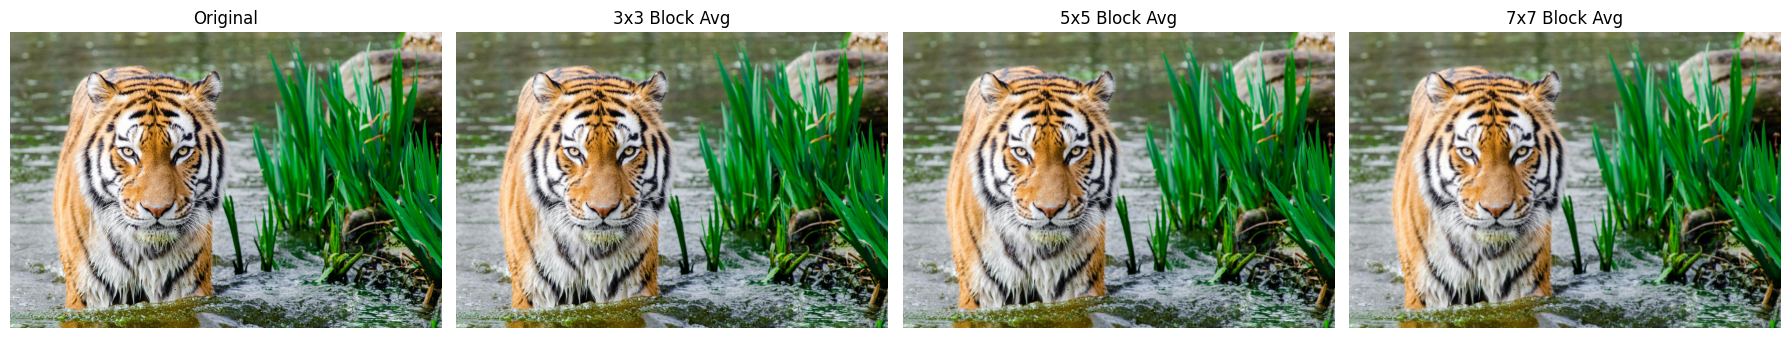

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def block_average_color(img, block_size):
    h, w, c = img.shape
    output = img.copy()
    
    for i in range(0, h - block_size + 1, block_size):
        for j in range(0, w - block_size + 1, block_size):
            for channel in range(c):
                block = img[i:i+block_size, j:j+block_size, channel]
                avg = int(np.mean(block))
                output[i:i+block_size, j:j+block_size, channel] = avg
    return output

# Load the original color image
img = cv2.imread('images/input.jpg')

# Ensure output folder exists
os.makedirs('outputs/task4', exist_ok=True)

# Start with original image
results = [("Original", img)]

# Block sizes for reduction
block_sizes = [3, 5, 7]

# Process and store outputs
for b in block_sizes:
    out = block_average_color(img, b)
    results.append((f"{b}x{b} Block Avg", out))
    cv2.imwrite(f'outputs/task4/block_avg_{b}x{b}.jpg', out)

# Display all images in one row
plt.figure(figsize=(18, 5))
for i, (label, result_img) in enumerate(results):
    plt.subplot(1, len(results), i + 1)
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()